<h1 align="center"> T20 World Cup Cricket Data Pre Processing </h1>

In [56]:
#import necessary libraries
import pandas as pd
import json

<h4 style="color:blue">(1) Process Match Results</h4>

In [57]:
with open('t20_wc_match_results.json') as f:
    data = json.load(f)

df_match = pd.DataFrame(data[0]['matchSummary'])
df_match.head()

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [58]:
df_match.shape

(45, 7)

**Use scorecard as a match id to link with other tables**

In [59]:
df_match.rename({'scorecard': 'match_id'}, axis = 1, inplace = True)
df_match.head()

,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


**Create a match ids dictionary that maps team names to a unique match id. This will be useful later on to link with other tables**

In [60]:
match_ids_dict = {}

for index, row in df_match.iterrows():
    key1 = row['team1'] + ' Vs ' + row['team2']
    key2 = row['team2'] + ' Vs ' + row['team1']
    match_ids_dict[key1] = row['match_id']
    match_ids_dict[key2] = row['match_id']

In [61]:
df_match.to_csv('dim_match_summary.csv', index = False)

<h4 style="color:blue">(2) Process Batting Summary</h4>

In [62]:
with open('t20_wc_batting_summary.json') as f:
    data = json.load(f)
    all_records = []
    for rec in data:
        all_records.extend(rec['battingSummary'])

df_batting = pd.DataFrame(all_records)
df_batting.head(11)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c †Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/†Mendis),44,28,4,0,157.14
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c †Mendis b Theekshana,0,1,0,0,0.00
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis†,c †Green b Wiese,6,6,0,0,100.00


In [63]:
df_batting['out/not_out'] = df_batting.dismissal.apply(lambda x: "out" if len(x)>0 else "not_out")
df_batting.head(11)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c †Mendis b Karunaratne,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/†Mendis),44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c †Mendis b Theekshana,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis†,c †Green b Wiese,6,6,0,0,100.00,out


In [64]:
df_batting['match_id'] = df_batting['match'].map(match_ids_dict)
df_batting.head()

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c †Mendis b Karunaratne,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,out,T20I # 1823


In [65]:
df_batting.drop(columns=["dismissal"], inplace=True)
df_batting.head(10)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out,T20I # 1823
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out,T20I # 1823
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out,T20I # 1823
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out,T20I # 1823
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis†,6,6,0,0,100.00,out,T20I # 1823


**Cleanup weird characters**

In [66]:
df_batting['batsmanName'] = df_batting['batsmanName'].apply(lambda x: x.replace('â€', ''))
df_batting['batsmanName'] = df_batting['batsmanName'].apply(lambda x: x.replace('\xa0', ''))
df_batting.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


In [67]:
df_batting.shape

(699, 11)

In [68]:
df_batting.to_csv('fact_bating_summary.csv', index = False)

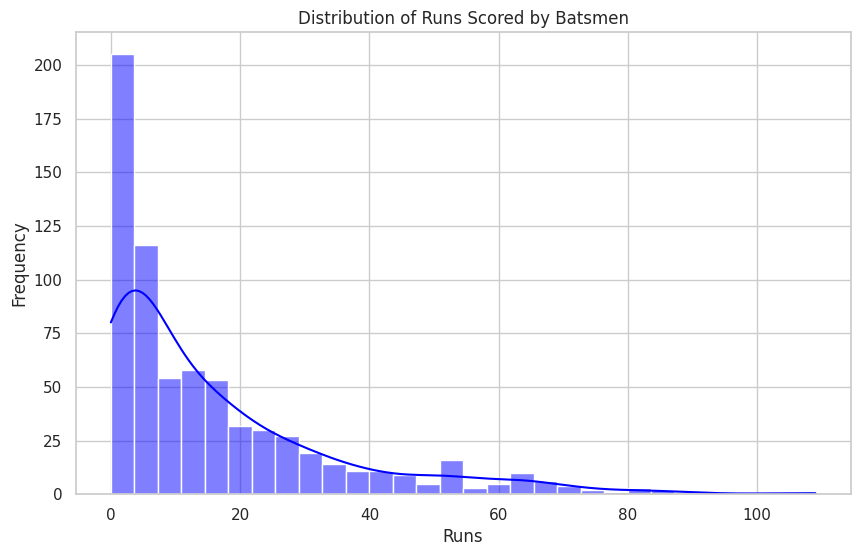

<ipython-input-70-f64c3f08bb20>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_played.values, y=matches_played.index, palette="viridis")


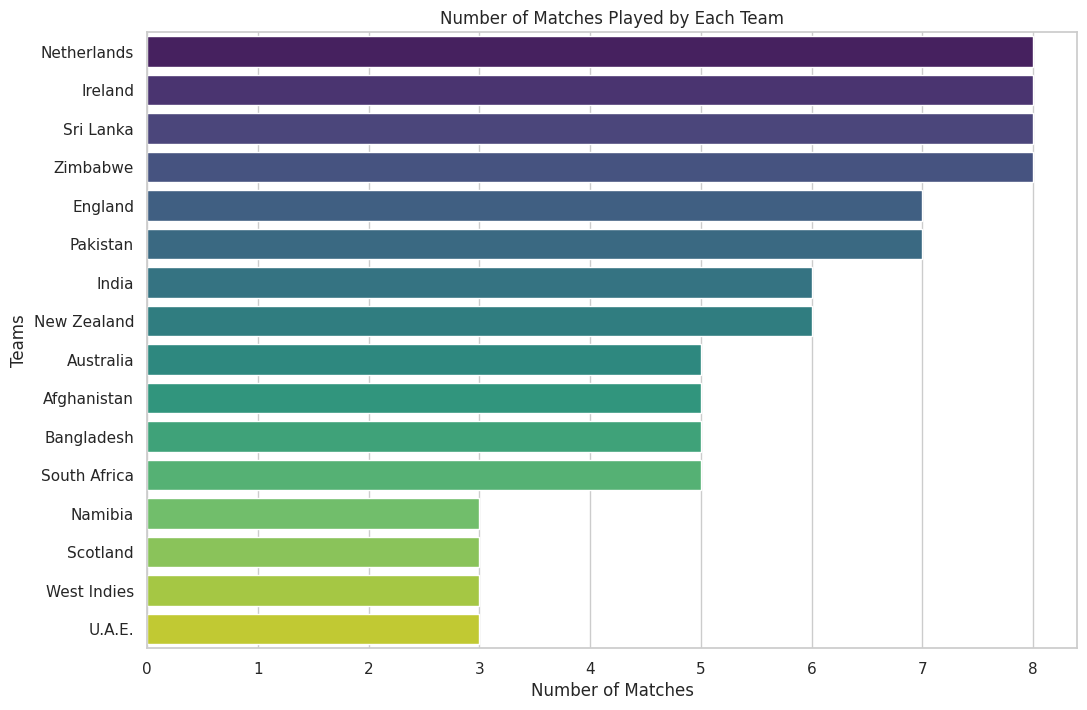

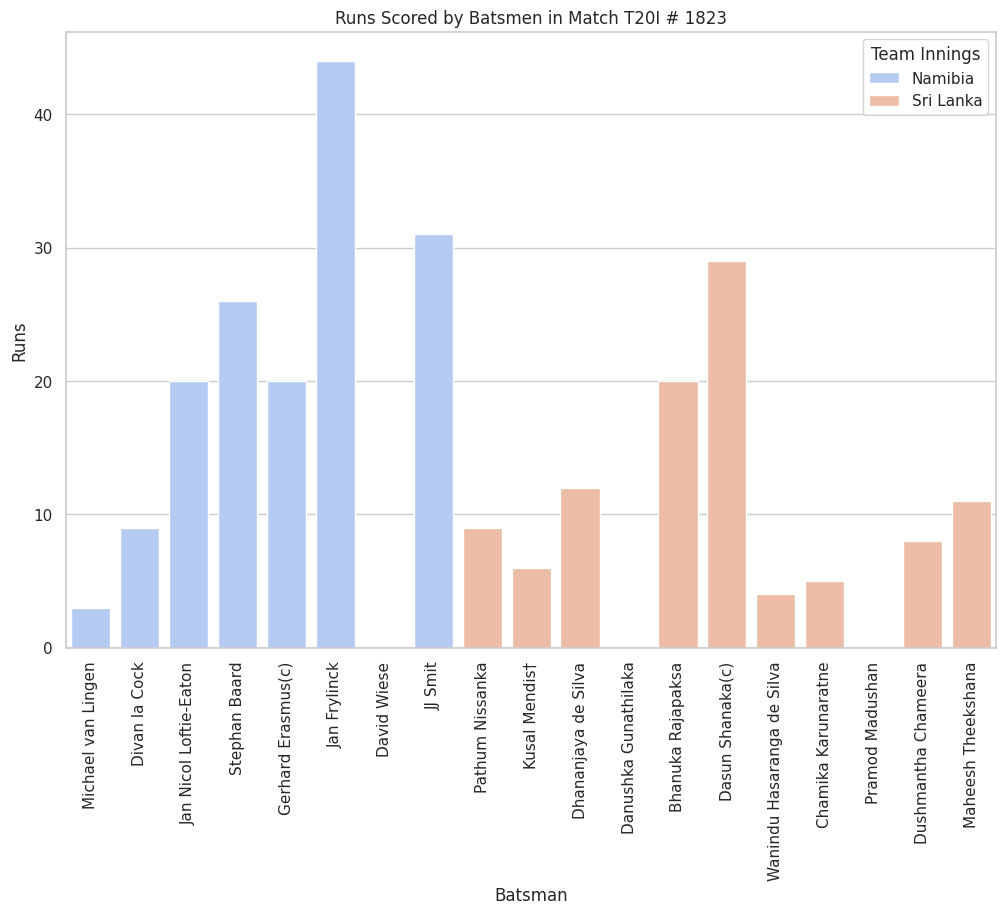

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df_match = pd.read_csv('dim_match_summary.csv')
df_batting = pd.read_csv('fact_bating_summary.csv')

# Ensure seaborn styles
sns.set(style="whitegrid")

# Visualization 1: Distribution of runs scored by batsmen
plt.figure(figsize=(10, 6))
sns.histplot(df_batting['runs'], bins=30, kde=True, color='blue')
plt.title('Distribution of Runs Scored by Batsmen')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Number of matches played by each team
matches_played = pd.concat([df_match['team1'], df_match['team2']]).value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=matches_played.values, y=matches_played.index, palette="viridis")
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Number of Matches')
plt.ylabel('Teams')
plt.show()

# Visualization 3: Comparison of runs scored by team in a particular match
match_id = 'T20I # 1823'
match_data = df_batting[df_batting['match_id'] == match_id]
plt.figure(figsize=(12, 8))
sns.barplot(x='batsmanName', y='runs', hue='teamInnings', data=match_data, palette="coolwarm")
plt.title(f'Runs Scored by Batsmen in Match {match_id}')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.xticks(rotation=90)
plt.legend(title='Team Innings')
plt.show()


<h4 style="color:blue">(3) Process Bowling Summary</h4>

In [ ]:
with open('t20_wc_bowling_summary.json') as f:
    data = json.load(f)
    all_records = []
    for rec in data:
        all_records.extend(rec['bowlingSummary'])
all_records[:2]

In [ ]:
df_bowling = pd.DataFrame(all_records)
print(df_bowling.shape)
df_bowling.head()

In [ ]:
df_bowling['match_id'] = df_bowling['match'].map(match_ids_dict)
df_bowling.head()

In [ ]:
df_bowling.to_csv('fact_bowling_summary.csv', index = False)

<h4 style="color:blue">(4) Process Players Information</h4>

In [ ]:
with open('t20_wc_player_info.json') as f:
    data = json.load(f)

In [ ]:
df_players = pd.DataFrame(data)

print(df_players.shape)
df_players.head(10)

**Cleanup weird characters**

In [ ]:
df_players['name'] = df_players['name'].apply(lambda x: x.replace('â€', ''))
df_players['name'] = df_players['name'].apply(lambda x: x.replace('†', ''))
df_players['name'] = df_players['name'].apply(lambda x: x.replace('\xa0', ''))
df_players.head(10)

In [ ]:
df_players[df_players['team'] == 'India']

In [ ]:
df_players.to_csv('dim_players_no_images.csv', index = False)